### Importing Libraries

In [ ]:
import os
import cv2
import random
import zipfile
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### Get the File Data

In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/My Drive/GC10.zip', 'r')
zip_ref.extractall('/content/GC10')
zip_ref.close()

### Take data and understand it

In [ ]:
image_paths = []
labels = []

for root, dirs, files in os.walk('/content/GC10'):
  for file in files:
    if file.endswith(('.jpg', '.png', '.jpeg')):
      image_paths.append(os.path.join(root, file))
      label = os.path.basename(root)
      labels.append(label)

df = pd.DataFrame({'image_path': image_paths, 'label': labels})
print(df.head())

                                    image_path label
0   /content/GC10/6/img_03_436152900_00535.jpg     6
1  /content/GC10/6/img_06_4406645900_00501.jpg     6
2  /content/GC10/6/img_02_4406645900_00346.jpg     6
3  /content/GC10/6/img_06_4406645900_00490.jpg     6
4   /content/GC10/6/img_01_425005700_00301.jpg     6


In [ ]:
df['label'].unique()

array(['6', '8', '7', '4', '10', '9', '2', '1', '5', '3'], dtype=object)

In [ ]:
label_mapping = {
    '1': 'punching_hole',
    '2': 'welding_line',
    '3': 'crescent_gap',
    '4': 'water_spot',
    '5': 'oil_spot',
    '6': 'silk_spot',
    '7': 'inclusion',
    '8': 'rolled_pit',
    '9': 'crease',
    '10': 'waist_folding'
}

In [ ]:
df['mapped_label'] = df['label'].map(label_mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_path    2312 non-null   object
 1   label         2312 non-null   object
 2   mapped_label  2312 non-null   object
dtypes: object(3)
memory usage: 54.3+ KB


In [ ]:
df['mapped_label'].value_counts()

,count
mapped_label,
silk_spot,651
water_spot,289
welding_line,273
crescent_gap,226
punching_hole,219
inclusion,216
oil_spot,204
waist_folding,150
crease,53


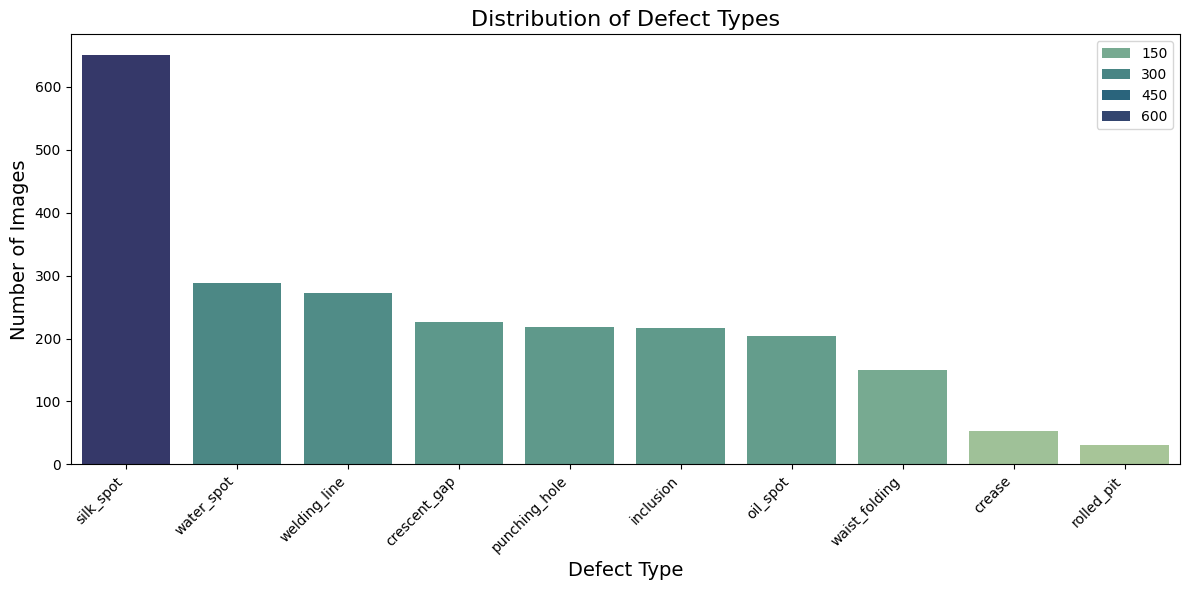

In [ ]:
# Visualize the Label Count or defect type distribution
label_counts = df['mapped_label'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, hue = label_counts.values,  palette='crest')
plt.title('Distribution of Defect Types', fontsize=16)
plt.xlabel('Defect Type', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

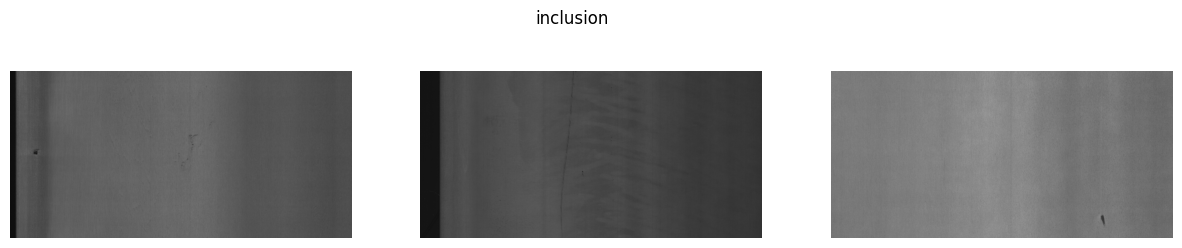

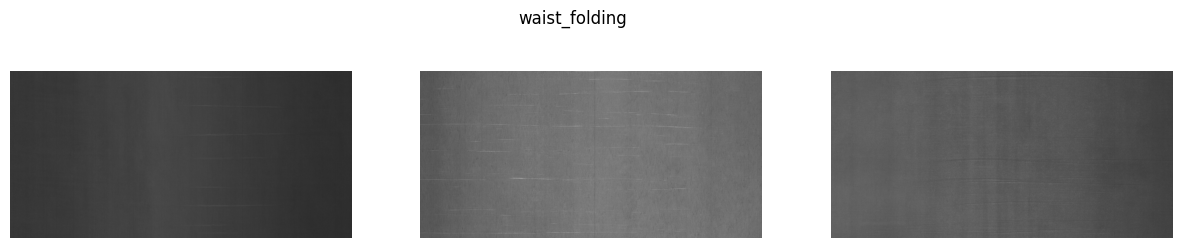

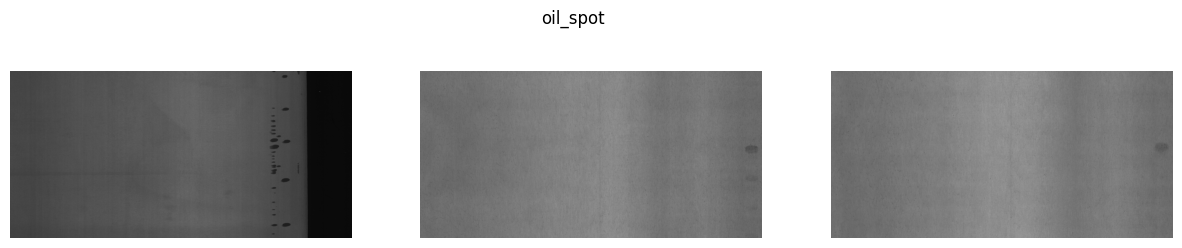

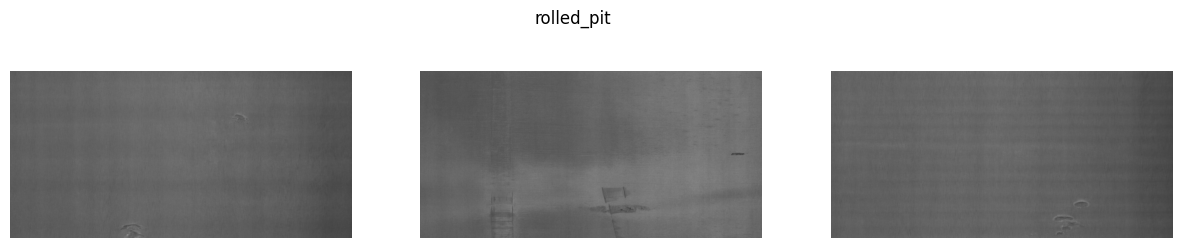

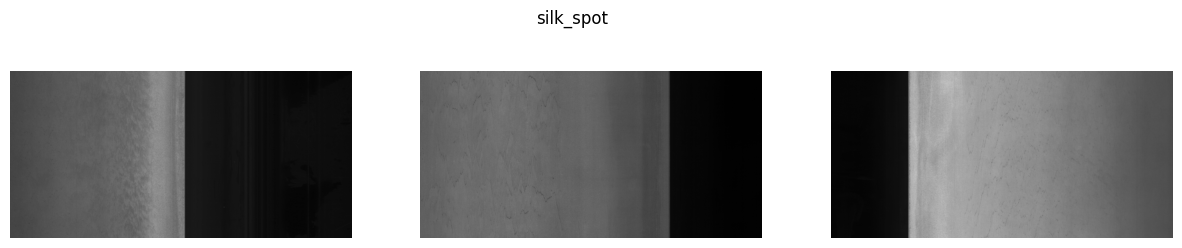

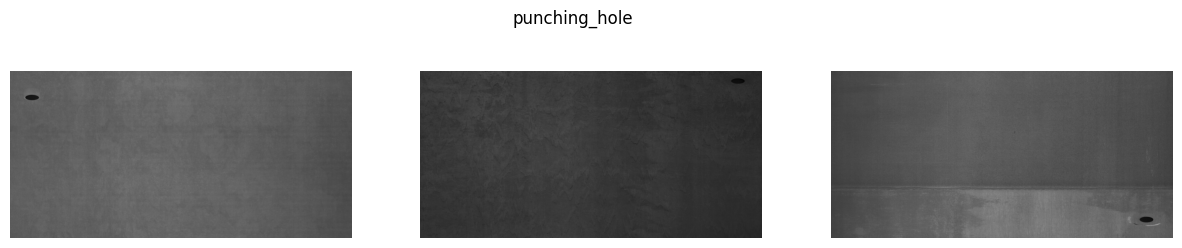

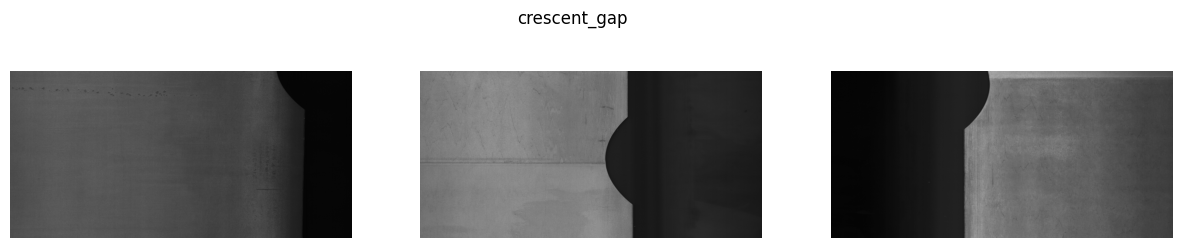

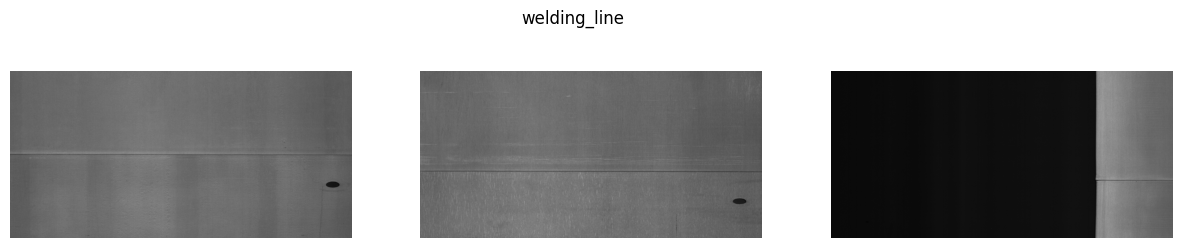

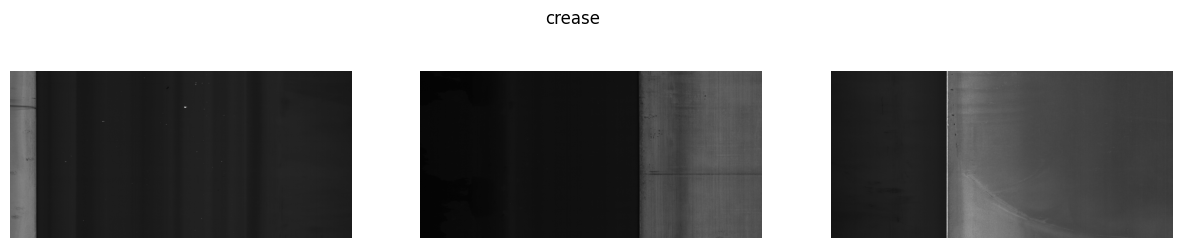

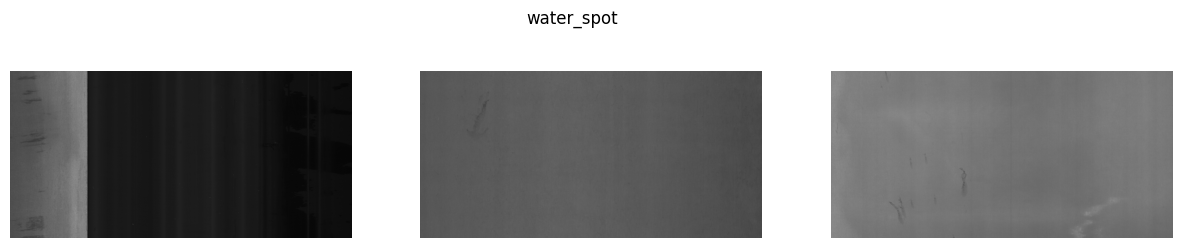

In [ ]:
# Function to display images in a row for a specific label
def display_images_for_label(label, num_images=3):
  label_df = df[df['mapped_label'] == label]
  if len(label_df) > 0:
    image_paths = label_df['image_path'].sample(n=min(num_images, len(label_df))).tolist()
    plt.figure(figsize=(15, 3))
    for i, image_path in enumerate(image_paths):
      img = cv2.imread(image_path)
      plt.subplot(1, num_images, i+1)
      plt.imshow(img)
      plt.axis('off')
    plt.suptitle(f"{label}", fontsize=12)
    plt.show()


# Display images for each unique label
unique_labels = df['mapped_label'].unique()
for label in unique_labels:
  display_images_for_label(label)

In [ ]:
# Count the number of files in each label folder
folder_path = '/content/GC10/lable'
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
print("Number of Files ", file_count)

Number of Files  2294


In [ ]:
df['Filename'] = df['image_path'].str.split('/').str[-1]

In [ ]:
#find duplicate filenames and their path

duplicate_files = df[df.duplicated(subset=['Filename'], keep=False)]

if not duplicate_files.empty:
  print("Duplicate filenames found:")
  print(duplicate_files[['Filename', 'image_path']])
else:
  print("No duplicate filenames found.")

Duplicate filenames found:
                         Filename  \
218    img_07_425391800_00054.jpg   
653    img_03_436068500_00002.jpg   
668    img_06_425505500_00052.jpg   
672    img_02_425392000_00984.jpg   
696    img_03_436068500_00002.jpg   
781    img_01_425503100_00018.jpg   
869    img_02_425392000_00984.jpg   
873    img_07_425503000_00061.jpg   
1149   img_07_425503000_00061.jpg   
1246   img_07_436163600_01161.jpg   
1325  img_06_3436814000_00687.jpg   
1383  img_06_3436814000_00687.jpg   
1435   img_04_425503600_00017.jpg   
1436   img_06_425502900_00052.jpg   
1437   img_03_425506300_00018.jpg   
1489   img_07_436163600_01161.jpg   
1560   img_06_425505500_00052.jpg   
1655   img_07_425502900_00052.jpg   
1701   img_06_425502900_00052.jpg   
1704   img_03_425506300_00018.jpg   
1737   img_07_425391800_00054.jpg   
1876   img_07_425502900_00052.jpg   
2119   img_04_425503600_00017.jpg   
2189   img_01_425503100_00018.jpg   

                                        image_p

In [ ]:
df['Filename'].value_counts().sort_values(ascending=False)

,count
Filename,
img_07_425391800_00054.jpg,2
img_06_3436814000_00687.jpg,2
img_03_425506300_00018.jpg,2
img_07_425503000_00061.jpg,2
img_03_436068500_00002.jpg,2
...,...
img_05_425503800_00053.jpg,1
img_04_4406772100_00001.jpg,1
img_01_425616200_00001.jpg,1


In [ ]:
# print the sample xml file content img_07_425391800_00054.xml
def print_xml_file_content(file_path):
  """Opens and prints the content of an XML file."""
  try:
    tree = ET.parse(file_path)
    root = tree.getroot()
    print(ET.tostring(root, encoding='unicode'))
  except FileNotFoundError:
    print(f"File not found: {file_path}")
  except Exception as e:
    print(f"An error occurred: {e}")


# Replace 'img_07_425391800_00054.xml' with the actual file path
xml_file_path = '/content/GC10/lable/img_07_425391800_00054.xml'
print_xml_file_content(xml_file_path)

<annotation>
	<folder>1</folder>
	<filename>img_07_425391800_00054.jpg</filename>
	<path>E:\002_Data\suface dectect\2-fuxinzhe\msos1\1\img_07_425391800_00054.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>2048</width>
		<height>1000</height>
		<depth>1</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>1_chongkong</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>1</xmin>
			<ymin>409</ymin>
			<xmax>44</xmax>
			<ymax>481</ymax>
		</bndbox>
	</object>
	<object>
		<name>2_hanfeng</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>1</xmin>
			<ymin>243</ymin>
			<xmax>2038</xmax>
			<ymax>309</ymax>
		</bndbox>
	</object>
</annotation>


In [ ]:
df['xml_filename'] = df['Filename'].str.replace('jpg', 'xml')

In [ ]:
#Read all xml file content in above dataframe and extract the unique <name> tag values from each <object> tag

def extract_unique_names_from_xml(df):
  """
  Reads XML file content from the 'xml_path' column of the DataFrame
  and extracts unique <name> tag values from each <object> tag.

  Args:
    df: pandas DataFrame with an 'xml_path' column containing XML file paths.

  Returns:
    A list of unique <name> tag values found in all XML files.
  """
  unique_names = set()
  for xml_path in df['xml_filename']:
    xml_path = os.path.join('/content/GC10/lable', xml_path)
    try:
      tree = ET.parse(xml_path)
      root = tree.getroot()
      for obj in root.findall('object'):
        name = obj.find('name').text
        unique_names.add(name)
    except FileNotFoundError:
      print(f"File not found: {xml_path}")
    except Exception as e:
      print(f"An error occurred while processing {xml_path}: {e}")
  return list(unique_names)


# Example usage:
unique_object_names = extract_unique_names_from_xml(df)
print("Unique <name> tag values:", unique_object_names)

File not found: /content/GC10/lable/img_08_4406743300_00407.xml
File not found: /content/GC10/lable/img_07_436164700_01539.xml
File not found: /content/GC10/lable/img_07_3436814000_00020.xml
File not found: /content/GC10/lable/img_06_425614600_00429.xml
File not found: /content/GC10/lable/img_06_425614600_00438.xml
File not found: /content/GC10/lable/img_05_425382900_00002.xml
Unique <name> tag values: ['5_youban', '9_zhehen', '2_hanfeng', '3_yueyawan', '10_yaozhed', '4_shuiban', 'd', '10_yaozhe', '1_chongkong', '6_siban', '8_yahen', '7_yiwu']


In [ ]:
#Get the filename where <name> tag is having value = 'd'

import xml.etree.ElementTree as ET
import os
import pandas as pd

def find_filename_with_name_d(df):
  """
  Finds the filename where the <name> tag in the corresponding XML file has the value 'd'.

  Args:
    df: A pandas DataFrame with a 'xml_filename' column containing the XML file names.

  Returns:
    A list of filenames where the <name> tag has the value 'd'.
  """
  filenames_with_name_d = []
  for xml_filename in df['xml_filename']:
    xml_path = os.path.join('/content/GC10/lable', xml_filename)
    try:
      tree = ET.parse(xml_path)
      root = tree.getroot()
      for obj in root.findall('object'):
        name = obj.find('name').text
        if name == 'd':
          filenames_with_name_d.append(xml_filename)
          break  # Stop searching in the current XML file if 'd' is found
    except FileNotFoundError:
      print(f"File not found: {xml_path}")
    except Exception as e:
      print(f"An error occurred while processing {xml_path}: {e}")
  return filenames_with_name_d

# Assuming 'df' is your DataFrame with the 'xml_filename' column
filenames_with_d = find_filename_with_name_d(df)

if filenames_with_d:
  print("Filenames where <name> tag has value 'd':")
  for filename in filenames_with_d:
    print(filename)
else:
  print("No filenames found where <name> tag has value 'd'.")

File not found: /content/GC10/lable/img_08_4406743300_00407.xml
File not found: /content/GC10/lable/img_07_436164700_01539.xml
File not found: /content/GC10/lable/img_07_3436814000_00020.xml
File not found: /content/GC10/lable/img_06_425614600_00429.xml
File not found: /content/GC10/lable/img_06_425614600_00438.xml
File not found: /content/GC10/lable/img_05_425382900_00002.xml
Filenames where <name> tag has value 'd':
img_02_425616500_00770.xml


In [ ]:
def count_name_tag_occurrences(df):
  """
  Counts the number of occurrences of each unique <name> tag value from XML files.

  Args:
    df: pandas DataFrame with an 'xml_filename' column containing XML file paths.

  Returns:
    A dictionary where keys are unique <name> tag values and values are their counts.
  """
  name_counts = {}
  for xml_filename in df['xml_filename']:
    xml_path = os.path.join('/content/GC10/lable', xml_filename)
    try:
      tree = ET.parse(xml_path)
      root = tree.getroot()
      for obj in root.findall('object'):
        name = obj.find('name').text
        if name in name_counts:
          name_counts[name] += 1
        else:
          name_counts[name] = 1
    except FileNotFoundError:
      print(f"File not found: {xml_path}")
    except Exception as e:
      print(f"An error occurred while processing {xml_path}: {e}")
  return name_counts


# Example usage:
name_tag_counts = count_name_tag_occurrences(df)
print("Occurrences of each unique <name> tag:")
for name, count in name_tag_counts.items():
  print(f"{name}: {count}")

File not found: /content/GC10/lable/img_08_4406743300_00407.xml
File not found: /content/GC10/lable/img_07_436164700_01539.xml
File not found: /content/GC10/lable/img_07_3436814000_00020.xml
File not found: /content/GC10/lable/img_06_425614600_00429.xml
File not found: /content/GC10/lable/img_06_425614600_00438.xml
File not found: /content/GC10/lable/img_05_425382900_00002.xml
Occurrences of each unique <name> tag:
6_siban: 884
5_youban: 569
1_chongkong: 334
2_hanfeng: 520
8_yahen: 87
7_yiwu: 350
4_shuiban: 356
3_yueyawan: 267
10_yaozhed: 131
10_yaozhe: 13
9_zhehen: 74
d: 1


From the above annotation distribution we can infer that annotation name tag is  not defined properly and does not match the images label distribution.
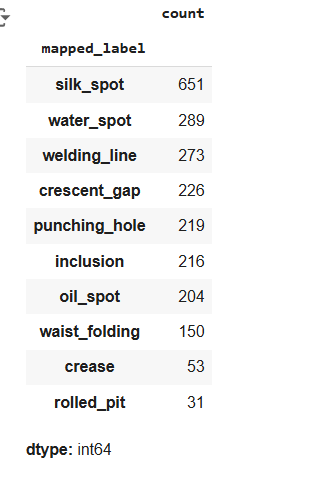

In [ ]:
# create a bounding boxes function to display image with xml path annotations

def plot_bounding_boxes(image_path, xml_path, label):
  """
  Displays an image with bounding boxes based on XML annotations.

  Args:
    image_path: Path to the image file.
    xml_path: Path to the corresponding XML annotation file.
  """
  try:
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    tree = ET.parse(xml_path)
    root = tree.getroot()

    for obj in root.findall('object'):
      bndbox = obj.find('bndbox')
      xmin = int(bndbox.find('xmin').text)
      ymin = int(bndbox.find('ymin').text)
      xmax = int(bndbox.find('xmax').text)
      ymax = int(bndbox.find('ymax').text)

      # Draw bounding box on the image
      cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)  # Red box
      cv2.putText(img, obj.find('name').text, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()
  except Exception as e:
    print(f"Error processing image/XML: {e}")


In [ ]:
# Call the above plot_bounding_boxes function for 3 samples of each label mapping defined in above dataframe

for label in df['mapped_label'].unique():
  label_df = df[df['mapped_label'] == label]
  if len(label_df) >= 3:
    for i in range(3):
      image_path = label_df.iloc[i]['image_path']
      xml_path = xml_path = os.path.join('/content/GC10/lable', label_df.iloc[i]['xml_filename'])
      plot_bounding_boxes(image_path, xml_path, label)
  else:
    print(f"Not enough samples for label: {label}")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df[df['xml_filename']=='img_02_425616500_00770.xml']

,image_path,label,mapped_label,Filename,xml_filename
1427,/content/GC10/2/img_02_425616500_00770.jpg,2,welding_line,img_02_425616500_00770.jpg,img_02_425616500_00770.xml


In [ ]:
# Create a mapping between xml name tags and image label tags according to description given in excel and above understanding
xml_to_label_mapping = {
    '6_siban': 'silk_spot',
    '5_youban': 'oil_spot',
    '1_chongkong': 'punching_hole',
    '2_hanfeng': 'welding_line',
    '8_yahen': 'rolled_pit',
    '7_yiwu': 'inclusion',
    '4_shuiban': 'water_spot',
    '3_yueyawan': 'crescent_gap',
    '10_yaozhed': 'waist_folding',
    '10_yaozhe': 'waist_folding',
    '9_zhehen': 'crease',
    'd': 'welding_line'
}

In [ ]:
def count_name_tag_occurrences_with_mapping(df):
  """
  Counts the number of occurrences of each unique <name> tag value from XML files.

  Args:
    df: pandas DataFrame with an 'xml_filename' column containing XML file paths.

  Returns:
    A dictionary where keys are unique <name> tag values and values are their counts.
  """
  name_counts = {}
  for xml_filename in df['xml_filename']:
    xml_path = os.path.join('/content/GC10/lable', xml_filename)
    try:
      tree = ET.parse(xml_path)
      root = tree.getroot()
      for obj in root.findall('object'):
        name = obj.find('name').text
        if name in xml_to_label_mapping:
          name = xml_to_label_mapping[name]
        if name in name_counts:
          name_counts[name] += 1
        else:
          name_counts[name] = 1
    except FileNotFoundError:
      print(f"File not found: {xml_path}")
    except Exception as e:
      print(f"An error occurred while processing {xml_path}: {e}")
  return name_counts


# Example usage:
name_tag_counts = count_name_tag_occurrences_with_mapping(df)
print("Occurrences of each unique <name> tag:")
for name, count in name_tag_counts.items():
  print(f"{name}: {count}")

File not found: /content/GC10/lable/img_08_4406743300_00407.xml
File not found: /content/GC10/lable/img_07_436164700_01539.xml
File not found: /content/GC10/lable/img_07_3436814000_00020.xml
File not found: /content/GC10/lable/img_06_425614600_00429.xml
File not found: /content/GC10/lable/img_06_425614600_00438.xml
File not found: /content/GC10/lable/img_05_425382900_00002.xml
Occurrences of each unique <name> tag:
silk_spot: 884
oil_spot: 569
punching_hole: 334
welding_line: 521
rolled_pit: 87
inclusion: 350
water_spot: 356
crescent_gap: 267
waist_folding: 144
crease: 74


In [ ]:
# Keep only the rows in the dataframe where the corresponding XML file exists in the specified directory
df = df[df['xml_filename'].apply(lambda x: os.path.exists(os.path.join('/content/GC10/lable', x)))]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2306 entries, 0 to 2311
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_path    2306 non-null   object
 1   label         2306 non-null   object
 2   mapped_label  2306 non-null   object
 3   Filename      2306 non-null   object
 4   xml_filename  2306 non-null   object
dtypes: object(5)
memory usage: 108.1+ KB


In [ ]:
def plot_bounding_boxes_with_mapping(image_path, xml_path, label):
  """
  Displays an image with bounding boxes based on XML annotations.

  Args:
    image_path: Path to the image file.
    xml_path: Path to the corresponding XML annotation file.
  """
  try:
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    tree = ET.parse(xml_path)
    root = tree.getroot()

    for obj in root.findall('object'):
      name = obj.find('name').text
      if name in xml_to_label_mapping:
        name = xml_to_label_mapping[name]
      bndbox = obj.find('bndbox')
      xmin = int(bndbox.find('xmin').text)
      ymin = int(bndbox.find('ymin').text)
      xmax = int(bndbox.find('xmax').text)
      ymax = int(bndbox.find('ymax').text)

      # Draw bounding box on the image
      cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)  # Red box
      cv2.putText(img, name, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()
  except Exception as e:
    print(f"Error processing image/XML: {e}")

In [ ]:
for label in df['mapped_label'].unique():
  label_df = df[df['mapped_label'] == label]
  if len(label_df) >= 3:
    for i in range(3):
      image_path = label_df.iloc[i]['image_path']
      xml_path = xml_path = os.path.join('/content/GC10/lable', label_df.iloc[i]['xml_filename'])
      plot_bounding_boxes_with_mapping(image_path, xml_path, label)
  else:
    print(f"Not enough samples for label: {label}")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.to_csv('GC10_data.csv')